# Explorative Analyse der Citibike Daten

Es werden verschiedene Visualisierungen der Citibike Daten betrachtet und diskutiert, welchen Mehrwert Citibike daraus ziehen könnte.

In [ ]:
from datasets.citibike_dataset import CitibikeDataset

citibike_dataset = CitibikeDataset("data/2023-citibike-tripdata/202312-citibike-tripdata/202312-citibike-tripdata_1.csv")

c:\Users\JanSchmitz\code\axa_challenge\datasets\citibike_dataset.py:37: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Funktion damit man sich in einem Plot aller Stationen für eine Fahrt die Start- und Endstation angucken kann:

In [9]:
import matplotlib.pyplot as plt

def mark_start_end(row, stations, start_col='start_station_id', end_col='end_station_id', id_col='station_id'):

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(stations['x_centered'], stations['y_centered'], s=5, alpha=0.7)
    ax.set_xlabel("X (Meter)")
    ax.set_ylabel("Y (Meter)")

    start_id = row[start_col]
    end_id = row[end_col]
    
    start_station = stations[stations[id_col] == start_id]
    end_station = stations[stations[id_col] == end_id]
    
    ax.scatter(start_station['x_centered'], start_station['y_centered'], s=15, c='green', marker='o', label='Start Station')
    ax.scatter(end_station['x_centered'], end_station['y_centered'], s=15, c='red', marker='o', label='End Station')
    
    ax.legend()

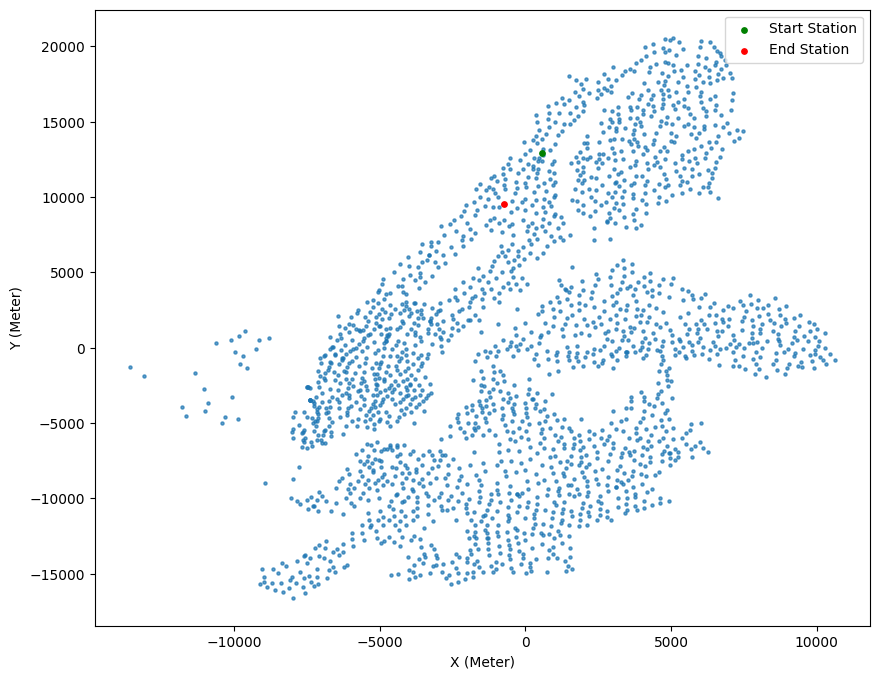

In [11]:
mark_start_end(citibike_dataset.df_rides.iloc[0], citibike_dataset.stations)

Durch Betrachtung mehrerer Samples lässt sich ggf. ein Gefühl für die gefahrenen Strecken gewinnen. Es wäre auch interessant zu einer Startstation alle Endstationen zu markieren. Aus Zeitgründen wurde dies nicht weiter verfolgt.

Plot in dem der Traffic aller Stationen visualisiert wird. Zur besseren Unterscheidbarkeit wird eine logarithmische Farbskala verwendet:

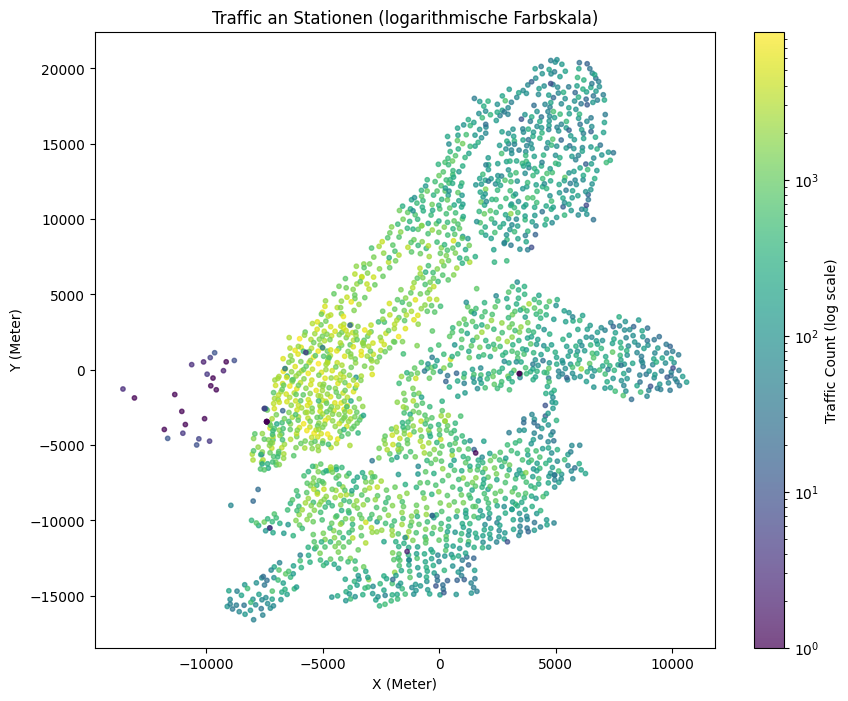

In [14]:
import matplotlib.colors as colors

station_traffic = (citibike_dataset.stations['start_count'] + citibike_dataset.stations['end_count']).values

fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(citibike_dataset.stations['x_centered'], citibike_dataset.stations['y_centered'], s=10, c=station_traffic, cmap='viridis', alpha=0.7,
                     norm=colors.LogNorm())

ax.set_xlabel("X (Meter)")
ax.set_ylabel("Y (Meter)")
ax.set_title("Traffic an Stationen (logarithmische Farbskala)")

# Farbleiste hinzufügen
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Traffic Count (log scale)')

plt.show()

Es wird die Erwartung bestätigt, dass gerade die Stationen im inneren Stadtgebiet sehr häufig verwendet werden und die Nutzung nach außen hin abnimmt. Rückschlüsse die für Citibike hilfreich sein könnten:

- Es gibt einige Stationen die im Vergleich zu den umliegenden Stationen weniger verwendet werden. Bei diesen Stationen könnten weitere Untersuchungen durchgeführt werden, um die Gründe dafür herauszufinden.
- Für Bereiche in denen die Nutzung gering ist könnten Maßnahmen zur Erhöhung der Nutzung durchgeführt werden.
- Es könnte geplant werden, an welchen Stellen zusätzliche Stationen hilfreich wären

Untersuchung wie oft die Stationen als Start- und Endpunkte genutzt wurden: 